In [1]:
 import numpy as np
 import pandas as pd
 import nltk #natural language toolkit
 import re #regular expression
 from textblob import TextBlob #to process textual data for language processing
 from wordcloud import WordCloud
 import seaborn as sns #data exploration and visualisation
 import matplotlib.pyplot as plt
 import cufflinks as cf
 %matplotlib inline
 from plotly.offline import init_notebook_mode, iplot
 init_notebook_mode(connected = True)
 cf.go_offline();
 from plotly.subplots import make_subplots


 import warnings
 warnings.filterwarnings("ignore")
 warnings.warn("this will not show")
 
 pd.set_option('display.max_columns', None)

In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
df = pd.read_csv("amazon.csv")

In [4]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [5]:
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [6]:
df = df.sort_values("wilson_lower_bound", ascending = False)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [7]:
def missing_values_analysis(df):
  na_columns_= [col for col in df.columns if df[col].isnull().sum()>0]
  n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
  ratio_ = (df[na_columns_].isnull().sum() / df.shape[0]* 100).sort_values(ascending= True)
  missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis= 1, keys = ['Missing Values', 'Ratio'])
  return missing_df

## optional step for knowing the dataset

def check_dataframe(df, head=5, tail = 5):
  print("SHAPE".center(82,'~'))
  print('Rows: {}'.format(df.shape[0]))
  print('columns: {}'.format(df.shape[1]))
  print("TYPES".center(82, '~'))
  print(df.dtypes)
  print("".center(82, '~'))
  print(missing_values_analysis(df))
  print('DUPLUCATED VALUES'.center(83,'~'))
  print(df.duplicated().sum())
  print("QUANTILES".center(82,'~'))
  print(df.quantile([0, 0.5, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLUCATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00   0.50   0.50        0.95       0.99         1.00
overall

In [8]:
def check_class(dataframe):
  nunique_df = pd.DataFrame({'variable': dataframe.columns,
                             'Classes': [dataframe[i].nunique()\
                                         for i in dataframe.columns]})
  nunique_df = nunique_df.sort_values('Classes', ascending = False)
  nunique_df = nunique_df.reset_index(drop = True)
  return nunique_df

check_class(df)

,variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [9]:
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import plotly.graph_objs as go


In [13]:
import matplotlib.pyplot as plt

def categorical_variable_summary(df, column_name):
  
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot countplot on the first subplot
    axs[0].bar(df[column_name].value_counts().index.astype(str), 
               df[column_name].value_counts().values,
               color=['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5'])
    axs[0].set_title('Countplot')
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Count')
    
    # Plot pie chart on the second subplot
    axs[1].pie(df[column_name].value_counts().values,
               labels=df[column_name].value_counts().index.astype(str),
               autopct='%1.1f%%',
               colors=['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5'])
    axs[1].set_title('Percentage')
    
    # Set the title for the entire figure
    fig.suptitle(column_name, y=0.9, x=0.5, ha='center')
    
    # Show the plot
    plt.show()







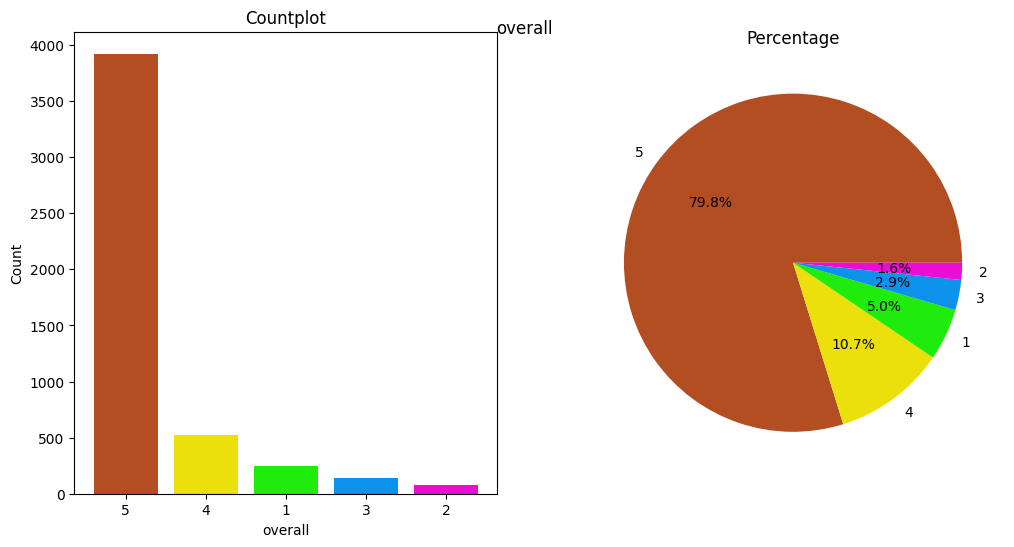

In [14]:
categorical_variable_summary(df, "overall")

In [15]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [27]:
review_example = df.reviewText[317]
review_example

'if your card gets hot enough to be painful  it is defective and you need to contact sandisk from my experience  the larger micro sds run hot on format and writing  but not to the pain threshold i purchased one of these cards to use in a camera and android tablet   great read speed but write speed was okay   used card for about two weeks and then all my files disappeared   tried to format the card and three different computers with xp  windows  and linux couldn t format it   the camera and tablet couldn t format it   i rma d it and got another because sandisk is a good brand   i did notice that when formatting or writing the card it got hot  very hot second card didn t last    hours and had the exact same symptoms as the first card   write a file or format it resulted in the card getting hot enough to reach the pain threshold   i called up sandisk and while explaining this was the second card i d received with the exact same symptoms  when i mentioned it getting hot  they immediately i

In [28]:
review_example = review_example.split()


In [29]:
type(review_example)


list

In [30]:
#review_example = re.sub("[^a-zA-Z]", ' ', review_example)
def remove(review_example):
    pattern = '[^a-zA-Z]'
    review_example = [re.sub(pattern, ' ', i) for i in review_example]
    return review_example

In [31]:
my_list = review_example

def capitalize_list(item):
    return item.lower()

review_example = list(map(capitalize_list, my_list))



In [32]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ', str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


In [33]:
#from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].iteritems():
  score= SentimentIntensityAnalyzer().polarity_scores(row)

  neg = score['neg']
  neu = score['neu']
  pos = score['pos']

  if neg>pos:
    df.loc[index, 'sentiment'] = "Negative"
  elif pos>neg:
    df.loc[index, 'sentiment'] = "Positive"
  else:
    df.loc[index, 'sentiment'] = "Neutral"

In [34]:
df[df['sentiment']=='Positive'].sort_values("wilson_lower_bound",
                                            ascending = False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


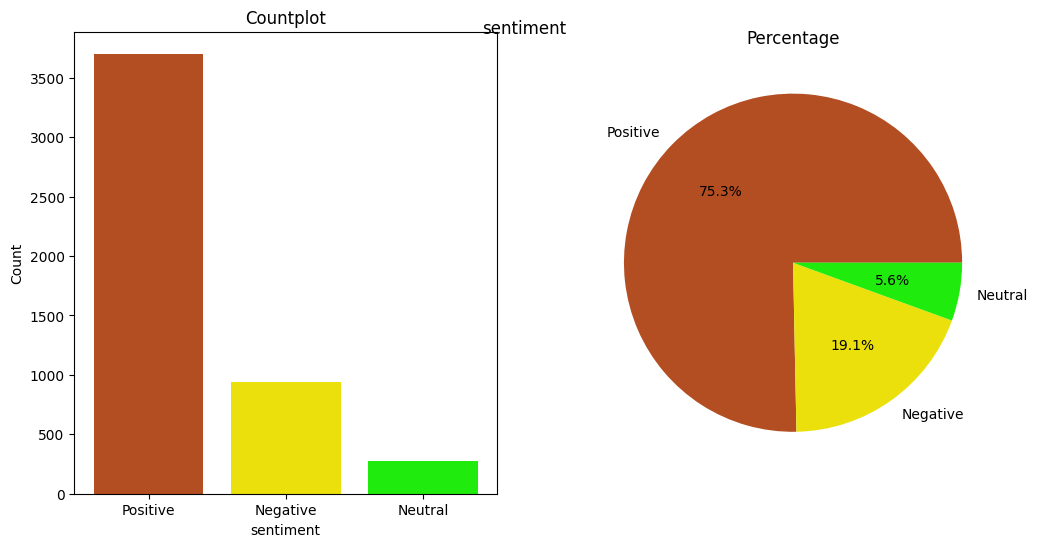

In [35]:
categorical_variable_summary(df, 'sentiment')